## Dataset description
### Physicochemical Properties of Protein Tertiary Structure
The data set is taken from CASP 5-9. There are 45730 decoys and size varying from 0 to 21 armstrong.

#### Attribute Information:
RMSD-Size of the residue.

F1 - Total surface area.

F2 - Non polar exposed area.

F3 - Fractional area of exposed non polar residue.

F4 - Fractional area of exposed non polar part of residue.

F5 - Molecular mass weighted exposed area.

F6 - Average deviation from standard exposed area of residue.

F7 - Euclidian distance.

F8 - Secondary structure penalty.

F9 - Spacial Distribution constraints (N,K Value).

For this project the F9 variable will be predicted by using the other 9 attributes.

Singh P. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure#]. Gwailior,MP,India,ABV - Indian Institute of Information Technology & Management.

### Initialization

Imported libraries

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats 

In [2]:
data = pd.read_csv("CASP.csv")
data.shape

(45730, 10)

### Exploratory Data Analysis (EDA)
Steps:
Data cleaning and preparation
    Data types?
    Missing values?
    Outliers?
    
Descriptive statistics
    Basic statistics
    Distribution and variability
    
Correlation Analysis
    Correlation matrix or relationships or dependencies
    
Data visualization
    Scatterplots/histograms/Boxplots for patterns and outliers
    
Principal Component Analysis(PCA)
    Identifying underlying patterns or structures
    Dimensionality reduction
    
Cluster Analysis
    Identify clusters or subgroups within the data
        Patterns  or trends
        
Hypothesis testing
    Confirm insights

Identifying if there is any NaN value or missing information in any of the columns, identify the type of variables we will be working with. This also gives an insight to any preprocessing step that must be done.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


There aren't missing values in the dataframe, and that we won't be working with any categorical variables. For preprocessing we might need to identify outliers, and most likely scalate the attributes. 

In [4]:
data.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


#### Scaling for visualization
There is quite a lot of disperssion between variables, so scalating the data will help visualize the data alltogether.
Note that this wont be the scaling used for the model training

In [6]:
scaler=MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [7]:
data_transform = scaler.transform(data)
data_transformdf = pd.DataFrame(data_transform)
columns = ['RMSD','F1','F2','F3','F4','F5','F6','F7','F8','F9'] #column labels
data_transformdf.columns = columns

#### Correlation Analysis
Creating a correlation heatmap from the data will help visualize the linear relationships between the attributes, as this might help identify dependency between them. (Having highly correlated features might increase complexity and will not bring additional information) 

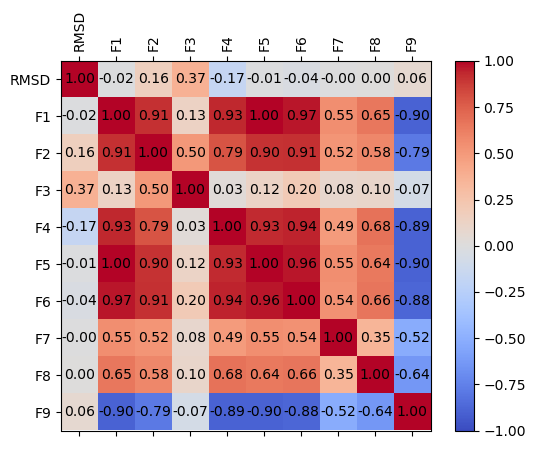

In [8]:
corr = data_transformdf.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_transformdf.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_transformdf.columns)
ax.set_yticklabels(data_transformdf.columns)
#Have correlation values inside heatmap
for (x, y), value in np.ndenumerate(corr):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")
plt.show()

It seems that RMSD and F3 attribute apparently have a very low correlation with F9, whereas all the other attributes have an inverse correlation with the objective variable.
F1, F2, F4, F5 and F6 seem to have a big correlation between them, maybe just selecting F1 or F5 will contribute more to the model in training.

#### Data Visualization
Visualizing the data in histograms will be helpful to visualize data distribution.

array([[<AxesSubplot:title={'center':'RMSD'}>,
        <AxesSubplot:title={'center':'F1'}>,
        <AxesSubplot:title={'center':'F2'}>],
       [<AxesSubplot:title={'center':'F3'}>,
        <AxesSubplot:title={'center':'F4'}>,
        <AxesSubplot:title={'center':'F5'}>],
       [<AxesSubplot:title={'center':'F6'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F8'}>],
       [<AxesSubplot:title={'center':'F9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

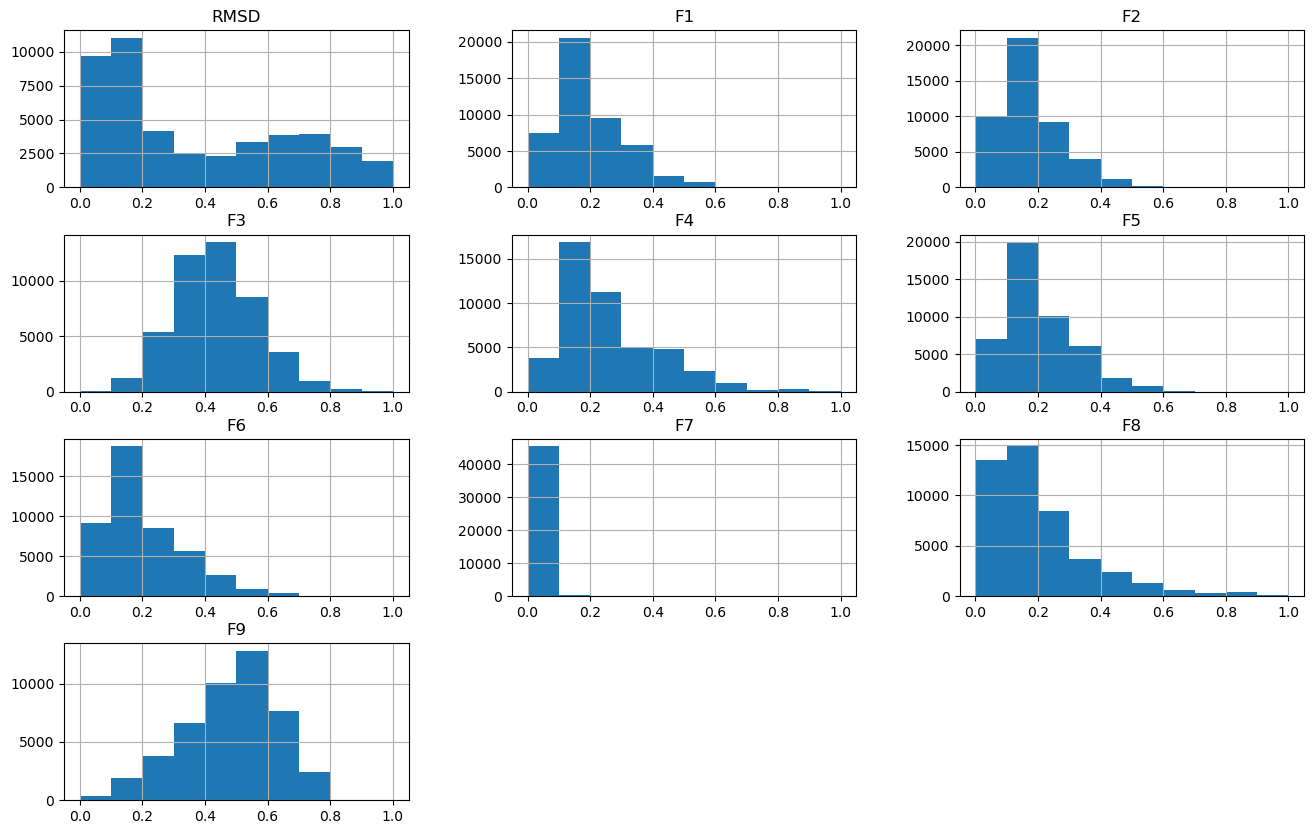

In [9]:
data_transformdf.hist(figsize = (16,10))

Boxplot will help identify if there are outliers and also gives insight on data distribution.

<AxesSubplot:>

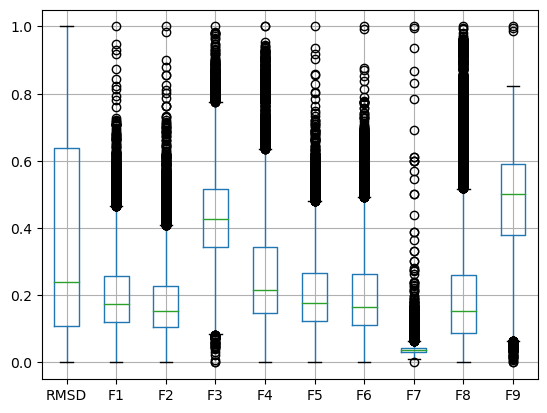

In [10]:
data_transformdf.boxplot()

It seems that there are many outliers, maybe calculating the proportion of outliers in each attribute with be useful.

# Convierte en funcion pls

In [103]:
#Calculate bins by getting Lower and Upper bounds for outlier testing. 
U,L,binned,proportion = [],[],[],[]
colnum = -1
for column in data_transformdf:
# Using IQR * 1.5 to bounds with no outliers
    #'''
    q3, q1 = np.percentile(data_transformdf[column], [75,25])
    iqr = (q3 - q1)*1.5 #iqr*1.5
    L.append(q1-iqr)
    U.append(q3+iqr)
    #'''
# Using 3 std to calculate bounds with no outliers
    '''
    U.append(data_transformdf[column].mean() + 3*data_transformdf[column].std())
    L.append(data_transformdf[column].mean() - 3*data_transformdf[column].std())
    '''
#Join bounds in list for posterior pd.cut command
    bins = pd.DataFrame([L,U])
#Calculate proportion of outliers
    colnum += 1
 #binned = pd.cut(data_logtf[column],bins = [bins.values[0][colnum],bins.values[1][colnum]])
    binned.append(pd.cut(data_transformdf[column],bins = [bins.values[0][colnum],bins.values[1][colnum]]))
 #a = binned.value_counts().to_frame()
    a = binned[colnum].value_counts().to_frame()
#proportion of outliers calculation
    proportion.append(len(data_logtf) - a.iloc[0][0])
#proportion.append(100 - (a.iloc[0][0]/(data_logtf.shape[0])*100))
proportions = pd.DataFrame(proportion).transpose()
proportions.index = ['Normal%']
proportions.columns = ['RMSD','F1','F2','F3','F4','F5','F6','F7','F8','F9']
proportions

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
Normal%,0,1162,1247,371,1221,1075,1312,546,2413,149


Most of the attributes have a considerable amount of outliers being F8 the one with most outlier proportion, but all except for F9 and F3 and RMSD have more than 1% of outliers.

### EDA after Log Transform

#### Log Transform
Using log transform might be useful as it will help to try have some attributes closer to normality and too reduce the amount of outliers.

In [12]:
data_logtf = (np.log((data_transformdf + 1)))
data_logtf.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000
mean,0.292434,0.177397,0.158236,0.355405,0.223804,0.181346,0.177896,0.036829,0.174196,0.387752
std,0.205689,0.086559,0.080368,0.090423,0.115832,0.087624,0.098431,0.015887,0.123666,0.104387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.104150,0.113980,0.100461,0.294629,0.138314,0.116063,0.105122,0.029439,0.084866,0.321523
50%,0.214736,0.159441,0.141416,0.356259,0.195304,0.163914,0.153847,0.035604,0.143482,0.406045
75%,0.492942,0.229993,0.204500,0.416119,0.295315,0.235994,0.234223,0.042901,0.231112,0.463731
max,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


#### correlation matrix

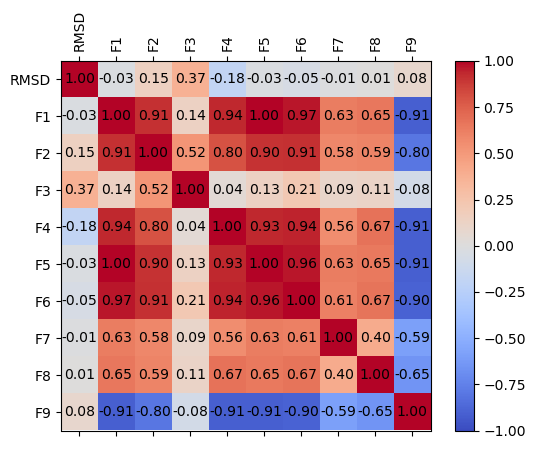

In [13]:
corr = data_logtf.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_logtf.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_logtf.columns)
ax.set_yticklabels(data_logtf.columns)
#Have correlation values inside heatmap
for (x, y), value in np.ndenumerate(corr):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")
plt.show()

It seems like correlation with objective variable got a little better after log transform

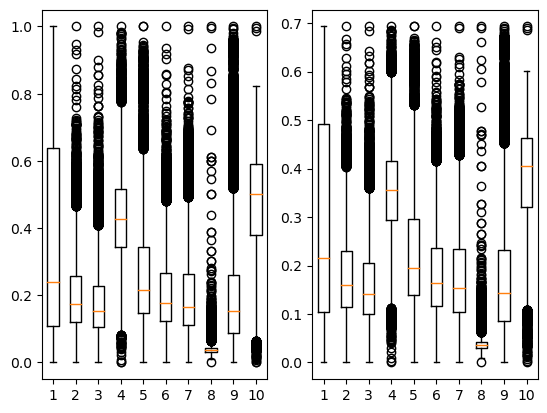

In [14]:
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(data_transformdf)
axs[1].boxplot(data_logtf)
plt.show()

#### Outliers 

In [88]:
#Calculate bins by getting Lower and Upper bounds for outlier testing.
U,L,binned,proportion = [],[],[],[]
colnum = -1
for column in data_logtf:
# Using IQR * 1.5 to bounds with no outliers
    #'''
    q3, q1 = np.percentile(data_logtf[column], [75,25])
    iqr = (q3 - q1)*1.5 #iqr*1.5
    L.append(q1-iqr)
    U.append(q3+iqr)
    #'''
# Using 3 std to calculate bounds with no outliers
    '''
    U.append(data_logtf[column].mean() + 3*data_logtf[column].std())
    L.append(data_logtf[column].mean() - 3*data_logtf[column].std())
    '''
#Join bounds in list for posterior pd.cut command
    bins = pd.DataFrame([L,U])
#Calculate proportion of outliers
    colnum += 1
 #binned = pd.cut(data_logtf[column],bins = [bins.values[0][colnum],bins.values[1][colnum]])
    binned.append(pd.cut(data_logtf[column],bins = [bins.values[0][colnum],bins.values[1][colnum]]))
 #a = binned.value_counts().to_frame()
    a = binned[colnum].value_counts().to_frame()
#proportion of outliers calculation
    proportion.append(len(data_logtf) - a.iloc[0][0])
#proportion.append(100 - (a.iloc[0][0]/(data_logtf.shape[0])*100))
proportionslog = pd.DataFrame(proportion).transpose()
prop = pd.concat([proportions,proportionslog])
prop.index = ['Normal%','Log Transform%']
prop.columns = ['RMSD','F1','F2','F3','F4','F5','F6','F7','F8','F9']
prop

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
Normal%,0,1162,1247,371,1221,1075,1312,546,2413,149
Log Transform%,0,825,851,354,601,698,738,539,1793,510


In [101]:
data_logtf[column].mean() + 3*data_logtf[column].std()
#pd.cut(data_logtf[column],bins = [bins.values[0][9],bins.values[0][9]]
binned[0].value_counts()

print(sum(proportions.sum()))
print(sum(proportionslog.sum()))

9496
6909


For the training dataset we will use RMSD and label without the log transform since all other attributes reduced their proportion of outliers after being transformed.

In [16]:
#Change names for knowing which corresponds to log data or just scaled data
data_logtf.columns = ['logRMSD','logF1','logF2','logF3','logF4','logF5','logF6','logF7','logF8','logF9']

In [17]:
#Eliminar filas de outliers de la columna F9
#data_logtf.drop(df.loc[])

In [18]:
attributes = data_transformdf.drop(['F9'],axis = 1)
logattributes = data_logtf.drop(['logF9'],axis = 1)
#pd.concat([proportions,proportionslog])
combined = pd.concat([attributes['RMSD'],logattributes],axis=1)
combined = combined.drop(['logRMSD'],axis=1)
label = data_transformdf['F9']

#### PCA


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
#logpca = PCA(n_components = 9)
pca.fit(combined)
#logpca.fit(logattributes)

PCA(n_components=9)

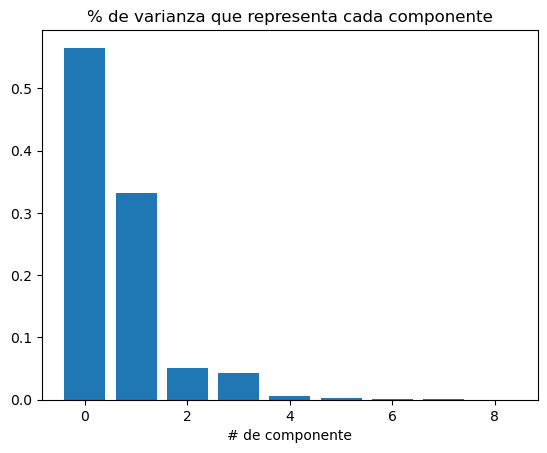

In [20]:
plt.bar(range(9),pca.explained_variance_ratio_)
plt.title("% de varianza que representa cada componente")
plt.xlabel("# de componente")
plt.show()

In [21]:
#pd.DataFrame([pca.explained_variance_ratio_[:3].sum(),logpca.explained_variance_ratio_[:3].sum()])
pca.explained_variance_ratio_[:2].sum()

0.896689037375922

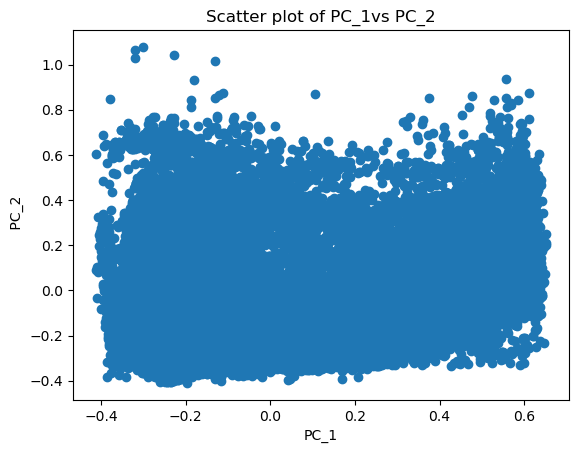

In [22]:
data_pca = pca.transform(combined).copy()
comp_1=1
comp_2=2
plt.scatter(data_pca[:,(comp_1-1)],data_pca[:,(comp_2-1)])
plt.title("Scatter plot of PC_"+str(comp_1)+"vs PC_"+str(comp_2))
plt.xlabel("PC_"+str(comp_1))
plt.ylabel(" PC_"+str(comp_2))
plt.show()

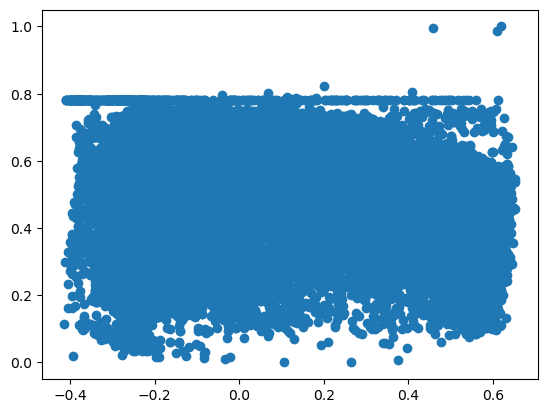

In [23]:
plt.scatter(data_pca[:,(comp_1-1)],data_transformdf['F9'])

### Modelling
Train test split

Linear regression

Regression trees

Regression forest

K-Nearest Neighbors

#### Evaluation
RMSE 

MAE

Adjusted R squared

In [24]:
from sklearn.model_selection import train_test_split
X = data.drop(['F9'],axis=1).copy() #training attributess
y = data['F9'] # label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_traintf = scaler.transform(X_train)
X_testtf = scaler.transform(X_test)
#Applying log transform to features
X_trainlogtf = np.log((X_traintf + 1))
X_testlogtf = np.log((X_testtf + 1))

In [26]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression().fit(X_trainlogtf, y_train)
#print(reg.score(X_trainlogtf, y_train)) #r2 score for train split
#print(reg.score(X_testlogtf,y_test)) #r2 score for test split
y_predtrain_lreg = lreg.predict(X_trainlogtf)
y_predtest_lreg = lreg.predict(X_testlogtf)

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Train R squared is  ", r2_score(y_train,y_predtrain_lreg))
print("Test R squared is ",r2_score(y_test,y_predtest_lreg))
print("Train RMSE squared is ",mean_squared_error(y_train,y_predtrain_lreg))
print("Test RMSE squared is ",mean_squared_error(y_test,y_predtest_lreg))
print("Train MAE squared is ",mean_absolute_error(y_train,y_predtrain_lreg))
print("Test MAE squared is ",mean_absolute_error(y_test,y_predtest_lreg))


Train R squared is   0.8518581269699579
Test R squared is  0.8470003723865502
Train RMSE squared is  5.271540996811106
Test RMSE squared is  5.532223361659549
Train MAE squared is  1.4995185880160775
Test MAE squared is  1.519518563522425


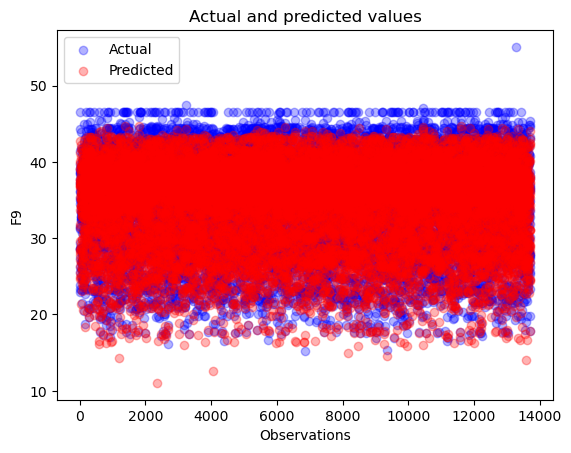

In [28]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predtest_lreg.size), y=y_predtest_lreg, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('F9')
plt.legend()
plt.show()

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 42)
dtreg.fit(X_trainlogtf, y_train)
y_predtrain_dtreg = dtreg.predict(X_trainlogtf)
y_predtest_dtreg = dtreg.predict(X_testlogtf)

In [30]:
print("Train R squared is  ", r2_score(y_train,y_predtrain_dtreg))
print("Test R squared is ",r2_score(y_test,y_predtest_dtreg))
print("Train RMSE squared is ",mean_squared_error(y_train,y_predtrain_dtreg))
print("Test RMSE squared is ",mean_squared_error(y_test,y_predtest_dtreg))
print("Train MAE squared is ",mean_absolute_error(y_train,y_predtrain_dtreg))
print("Test MAE squared is ",mean_absolute_error(y_test,y_predtest_dtreg))

Train R squared is   0.9987866958988973
Test R squared is  0.8168821138036225
Train RMSE squared is  0.043174709349494446
Test RMSE squared is  6.621251722996088
Train MAE squared is  0.024351754813449547
Test MAE squared is  1.2427476731783171


Is the DT being affected by the colinearity o

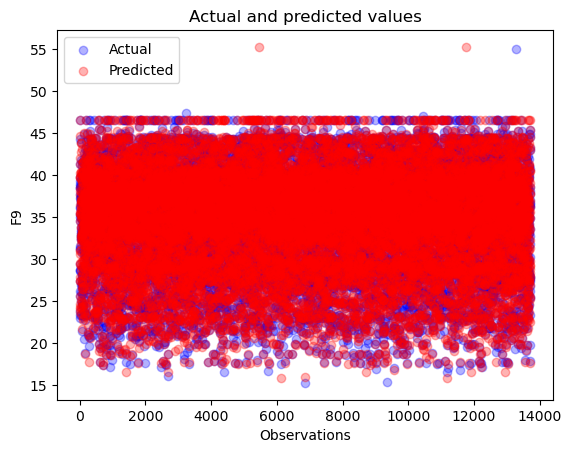

In [31]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predtest_dtreg.size), y=y_predtest_dtreg, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('F9')
plt.legend()
plt.show()
